# Practical Exam: Pet Box Subscription

Import libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('pet_supplies_2212.csv')

Data investigation

In [148]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [149]:
df.shape

(1500, 8)

In [150]:
df.isna().sum().sort_values()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
repeat_purchase      0
rating             150
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [152]:
for col in df.columns:
    print(col)
    print(pd.unique(df[col]))
    print('#'*50)

product_id
[   1    2    3 ... 1498 1499 1500]
##################################################
category
['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']
##################################################
animal
['Bird' 'Dog' 'Cat' 'Fish']
##################################################
size
['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']
##################################################
price
['51.1' '35.98' '31.23' '24.95' '26.18' '30.77' '31.04' '28.9' '17.82'
 '24.93' '40.87' '34.96' '31.07' '40.8' '33.13' '43.09' '28.29' '43.91'
 '33.87' '44' 'unlisted' '41' '32.98' '22.99' '38.99' '45.83' '28.24'
 '28.19' '27.79' '38.86' '22.89' '26.07' '28.02' '23.99' '28.25' '30.87'
 '28.09' '29.01' '26.13' '54.03' '31.2' '30.92' '20.95' '17.98' '27.7'
 '24.8' '31.09' '19.83' '33.15' '21.25' '38.06' '30.89' '35.04' '26.03'
 '33.94' '25.81' '32.99' '17.9' '30.96' '40.93' '24.98' '26.08' '23.08'
 '26' '22.95' '39.03' '23.19' '31' '21.05' '31.5' 

Data cleaning

In [153]:
df['category'] = df[['category']].replace('-','Unknown')
pd.unique(df['category'])

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [154]:
df['size'] = df['size'].str.capitalize()
pd.unique(df['size'])

array(['Large', 'Medium', 'Small'], dtype=object)

In [155]:
df1=df
df1['price'] = df1[['price']].replace('unlisted', np.nan).astype(float)
price_median = df1['price'].median()
price_median

28.064999999999998

In [156]:
df['price'] = df[['price']].replace(np.nan, price_median).round(2)
pd.unique(df['price'])[:10]

array([51.1 , 35.98, 31.23, 24.95, 26.18, 30.77, 31.04, 28.9 , 17.82,
       24.93])

In [157]:
df['rating'] = df[['rating']].replace(np.nan, 0).astype(int)
pd.unique(df['rating'])

array([7, 6, 5, 4, 8, 1, 3, 0, 2, 9])

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int32  
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 88.0+ KB


In [159]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7,1
1,2,Housing,Bird,Medium,35.98,963.60,6,0
2,3,Food,Dog,Medium,31.23,898.30,5,1
3,4,Medicine,Cat,Small,24.95,982.15,6,1
4,5,Housing,Cat,Small,26.18,832.63,7,1


In [160]:
df.to_csv('pet_supplies_cleaned.csv')

### Data Analysis

In [161]:
z= pd.DataFrame(df.groupby('category')['repeat_purchase'].sum()).reset_index()
z

,category,repeat_purchase
0,Accessory,70
1,Equipment,221
2,Food,151
3,Housing,152
4,Medicine,153
5,Toys,145
6,Unknown,14


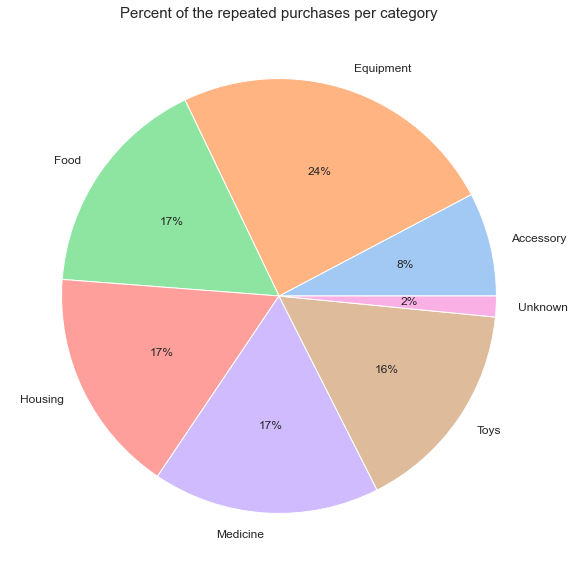

In [162]:
labels = z['category']
values = z['repeat_purchase']
colors = sns.color_palette('pastel')
plt.figure(figsize = (12,10))
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 12})
plt.title('Percent of the repeated purchases per category', fontsize=15)
plt.savefig('repeated_purchases_per_category.jpg',format="jpg",dpi=500)
plt.show()

From the pie chart the equipment category has the most repeated purchases 24%. The categories food, housing, and medicine are balanced having the same purchase percentage, followed by toys which have a 1% difference from the previous categories, the equipment category is taking the lead by 24% and the least repeated purchase categories are accessory and unknown. 

C:\Users\G202112990\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


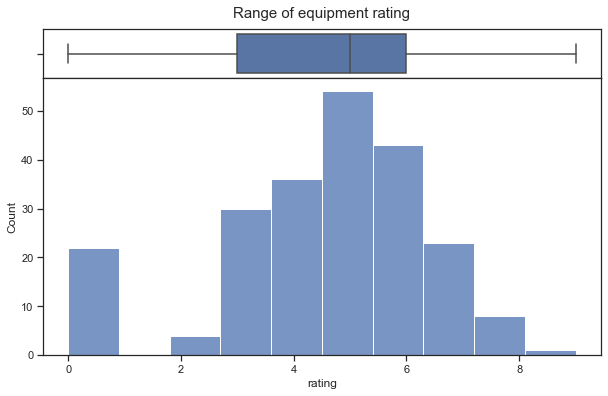

In [163]:
data=df[(df['repeat_purchase'] == 1) & (df['category'] == 'Equipment')]
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))
plt.subplots_adjust(hspace=0)
# Add a graph in each part
sns.boxplot(data['rating'], ax=ax_box)
sns.histplot(data['rating'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.title('Range of equipment rating', y=1.0, pad=60,fontsize=15)
plt.savefig('boxhist.jpg', dpi=500)
plt.show();

The range of the equipment rating shows that 50% of the ratings are between 3 and 6 stars with median and mean around 5 stars, there are more 30 ratings have 7 stars or above and around 20 ratings with 0 rating.

In [164]:
x=pd.DataFrame(df.groupby(['category','animal','size'])['sales'].sum()).reset_index()
x.head()

,category,animal,size,sales
0,Accessory,Bird,Large,55307.18
1,Accessory,Bird,Medium,12880.51
2,Accessory,Cat,Large,3003.40
3,Accessory,Cat,Medium,3086.95
4,Accessory,Cat,Small,2147.29


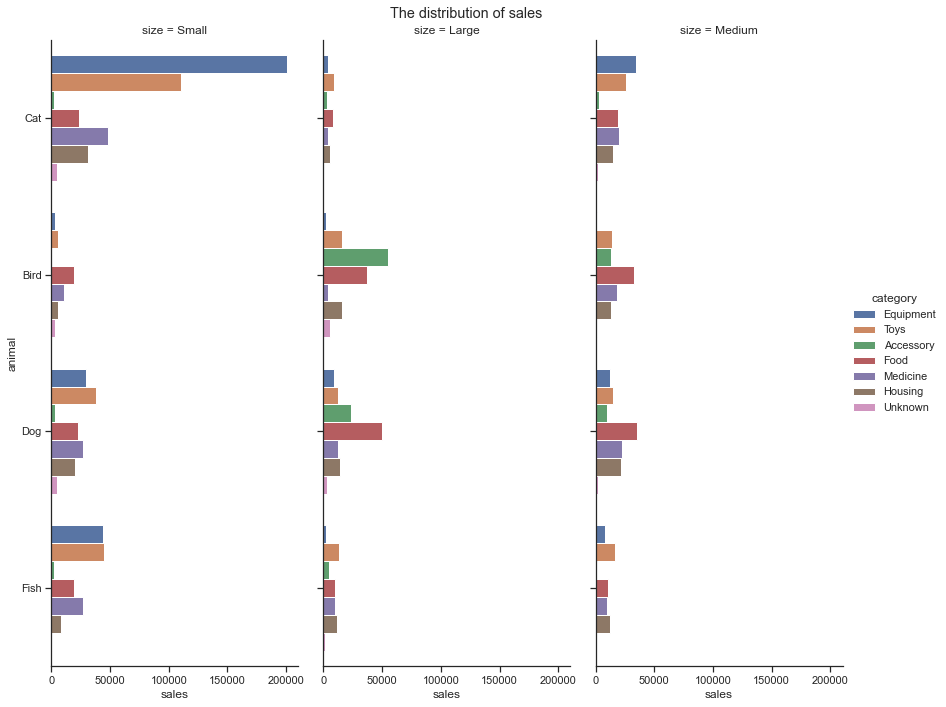

In [165]:
sns.catplot(x='sales', y='animal', data=x.sort_values(by=['sales'], ascending=False), hue='category',
             col='size', kind='bar',height=10, aspect=0.4)
plt.subplots_adjust(top=0.935)
plt.suptitle('The distribution of sales')
plt.savefig('distribution_of_sales.jpg',format="jpg",dpi=500)
plt.show();

The count plot shows the distribution of sales over the animal, size, and category. Starting with animals, cats are the most sold followed by birds and dogs, fish comes in the last place. The most sold sizes the small, large, and medium sizes come in second and third place, respectively. category wise, equipment is the most sold, then toys, accessories, food and medicine, housing and unknown come at the two last places. The plot shows the overall sales for each animal and category VS size, but it also allows tracking of sales each category for a specific animal and size. Cat's small size equipment and toys are achieving more than 300,000 sales, which is outperforming all other animals, categories and sizes.

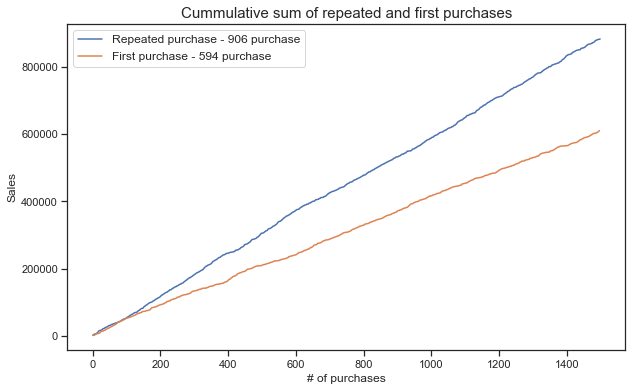

In [166]:
repeat_purchase = len(df[df['repeat_purchase'] == 1])
first_purchase = len(df[df['repeat_purchase'] == 0])
plt.figure(figsize = (10,6))
df[df['repeat_purchase'] == 1]['sales'].cumsum().plot(label= f'Repeated purchase - {repeat_purchase} purchase')
df[df['repeat_purchase'] == 0]['sales'].cumsum().plot(label= f'First purchase - {first_purchase} purchase')
plt.title('Cummulative sum of repeated and first purchases', fontsize=15)
plt.xlabel('# of purchases',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend(fontsize=12)
plt.savefig('CumSum.jpg',format="jpg",dpi=500)
plt.show();

In order to describe the relationship between repeat sales and purchases a comparison between the cumulative sum of repeated and first purchases was conducted. The plot shows that the repeated purchases maximum sales value is around 850,000 and for the first purchase is almost 600,000. It is important to notice that repeated purchases are 1.5 times more than first-time purchases in the dataset.

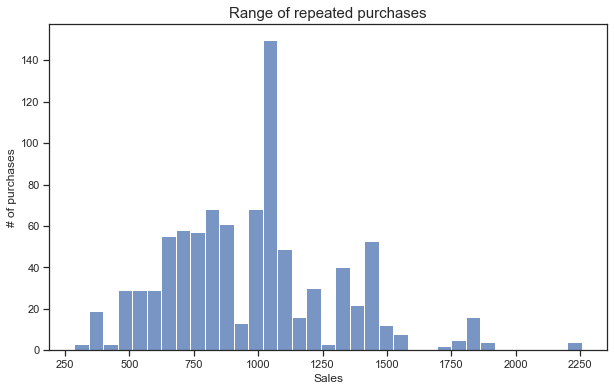

In [167]:
plt.figure(figsize = (10,6))
sns.histplot(x='sales', data=df[df['repeat_purchase'] == 1],bins=35)
plt.title('Range of repeated purchases', fontsize=15)
plt.ylabel('# of purchases',fontsize=12)
plt.xlabel('Sales',fontsize=12)
plt.savefig('hist.jpg',format="jpg",dpi=500)
plt.show();

The range of the repeated purchases shows that the most frequent sales are that of 1050. Less purchases are more than 1500 and most sales are distributed between 500 and 950.

### Conclusion

Based on the above analysis, the PetMind team should focus on the sales of equipment to increase the profit, and also they should pay attention to the accessories to increase its sharing percentage. Cats are the most loved animals in small sizes. Repeated purchases achieve sales more than first-time purchases by 250,000. Further analysis should be done using the rating to know the effect of rating on sales.